<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Aprendizaje no supervisado

## Objetivos de la clase

* Aprender conceptos básicos de aprendizaje no supervisados en python.

## Contenidos

* [Aprendizaje no supervisado](#c1)
* [Ejemplos en python](#c2)


<a id='c1'></a>

## I.- Aprendizaje no supervizado

Aprendizaje no supervisado es un método de Aprendizaje Automático donde un modelo es ajustado a las observaciones. Se distingue del Aprendizaje supervisado por el hecho de que no hay un conocimiento a priori. En el aprendizaje no supervisado, un conjunto de datos de objetos de entrada es tratado. Así, el aprendizaje no supervisado típicamente trata los objetos de entrada como un conjunto de variables aleatorias, siendo construido un modelo de densidad para el conjunto de datos.

<img src="https://www.researchgate.net/profile/Laith_Abualigah/publication/322455242/figure/fig1/AS:582970224644096@1516002340891/An-example-of-the-document-clustering.png" width="400" height="480" align="center"/>


### K-means

[K-means](https://es.wikipedia.org/wiki/K-means) es probablemente uno de los algoritmos de agrupamiento más conocidos y, en un sentido más amplio, una de las técnicas de aprendizaje no supervisado más conocidas.

K-means es en realidad un algoritmo muy simple que funciona para reducir al mínimo la suma de las distancias cuadradas desde la media dentro del agrupamiento. Matemáticamente:
\begin{align*}
(P) \ \textrm{Minimizar } f(C_l,\mu_l) = \sum_{l=1}^k \sum_{x_n \in C_l} ||x_n - \mu_l ||^2 \textrm{, respecto a } C_l, \mu_l,
\end{align*}
donde $C_l$ es el cluster l-ésimo y $\mu_l$ es el centroide l-ésimo.

El problema anterior es NP-hard (imposible de resolver en tiempo polinomial, del tipo más difícil de los probleams NP).

<img src="https://miro.medium.com/max/1984/1*GSFq5pXyAJAZetVmOqRb8g.gif" width="480" height="480" align="center"/>



## II.- Ejemplo con python

### a) Ejemplo K-means

Veamos un ejemplo de análisis no supervisado ocupando el algoritmo **k-means**.

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.datasets.samples_generator import make_blobs

pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes

# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

C:\Users\Andrés\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
def init_blobs(N, k, seed=42):
    X, y = make_blobs(n_samples=N, centers=k,
                      random_state=seed, cluster_std=0.60)
    return X

# generar datos
X = init_blobs(10000, 6, seed=43)
df = pd.DataFrame(X, columns=["x", "y"])



df.head()

,x,y
0,-6.953617,-4.989933
1,-2.681117,7.583914
2,-1.510161,4.933676
3,-9.748491,5.479457
4,-7.438017,-4.597754


Debido a que trabajamos con el concepto de distancia, muchas veces las columnas del dataframe pueden estar en distintas escalas, lo cual puede complicar a los algoritmos ocupados (al menos con **sklearn**). 

En estos casos, se suele **normalizar** los atributos, es decir, dejar los valores en una escala acotada y/o con estimadores fijos. Por ejemplo, en ***sklearn** podemos encontrar las siguientes formas de normalizar:

* **StandardScaler**: se normaliza  restando la media y escalando por su desviación estanda.
$$x_{prep} = \dfrac{x-u}{s}$$

La ventaja es que la media del nuevo conjunto de datos cumple con la propiedad que su media $\mu$ es igual a cero y su desviación estandar $s$ es igual a 1.
* **MinMaxScaler**:  se normaliza ocupando los valores de los mínimos y máximo del conjunto de datos.
$$x_{prep} = \dfrac{x-x_{min}}{x_{min}-x_{max}}$$

Esta forma de normalizar resulta útil cuando la desviación estandar $s$ es muy pequeña (cercana) a cero, por lo que lo convierte en un estimador más roubusto que el **StandardScaler**.

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns = ['x', 'y']
df[columns] = scaler.fit_transform(df[columns])

df.head()

,x,y,cluster
0,-0.579033,-1.831435,0
1,0.408821,1.194578,4
2,0.679560,0.556774,1
3,-1.225241,0.688121,2
4,-0.691032,-1.737053,0


In [4]:
# comprobar resultados del estimador
df.describe()

,x,y
count,1.000000e+04,1.000000e+04
mean,2.060574e-16,-2.285105e-15
std,1.000050e+00,1.000050e+00
min,-1.638247e+00,-2.410317e+00
25%,-8.015576e-01,-4.418042e-01
50%,-2.089351e-01,1.863259e-01
75%,5.480066e-01,8.159808e-01
max,2.243358e+00,1.639547e+00


Con esta parametrización procedemos a graficar nuestros resultados:

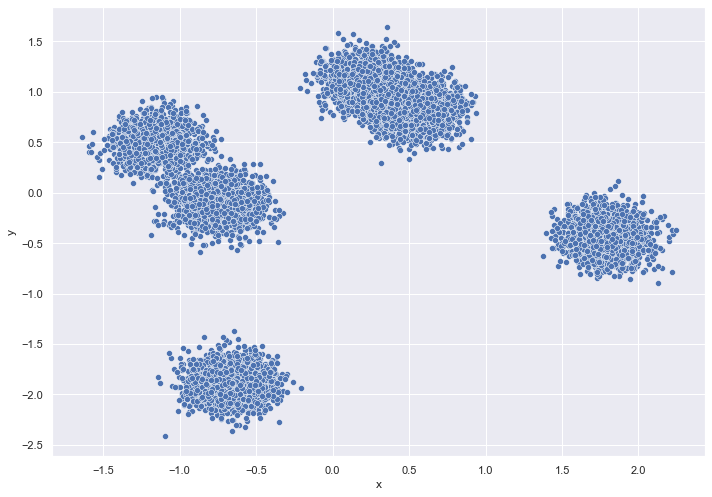

In [5]:
# graficar 
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot( data=df,x="x", y="y")

Ahora ajustamos el algoritmo **KMeans** de **sklearn**. Primero, comprendamos los hiperparámetros más importantes:

- **n_clusters**: El número de clusters a crear, o sea **K**. Por defecto es 8
- **init**: Método de inicialización. Un problema que tiene el algoritmo K-Medias es que la solucción alcanzada varia según la inicialización de los centroides. `sklearn` empieza usando el método `kmeans++` que es una versión más moderna y que proporciona mejores resultados que la inicialización aleatoria (random)
- **n_init**: El número de inicializaciones a probar. Básicamente `KMeans` aplica el algoritmo `n_init` veces y elige los clusters que minimizan la inercia.
- **max_iter**: Máximo número de iteraciones para llegar al criterio de parada.
- **tol**: Tolerancia para declarar criterio de parada (cuanto más grande, antes parará el algoritmo).

In [6]:
# ajustar modelo: k-means

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6)
kmeans.fit(X)


centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_ # clusters

In [12]:
# etiquetar los datos con los clusters encontrados
df["cluster"] = clusters
df["cluster"] = df["cluster"].astype('category')
centroids_df = pd.DataFrame(centroids, columns=["x", "y"])
centroids_df["cluster"] = [1,2,3,4,5,6]
centroids_df

,x,y,cluster
0,-0.664538,-1.878750,1
1,0.555390,0.811417,2
2,-1.153784,0.495945,3
3,1.790191,-0.435972,4
4,0.228483,1.106621,5
5,-0.747757,-0.105167,6


<AxesSubplot:xlabel='x', ylabel='y'>

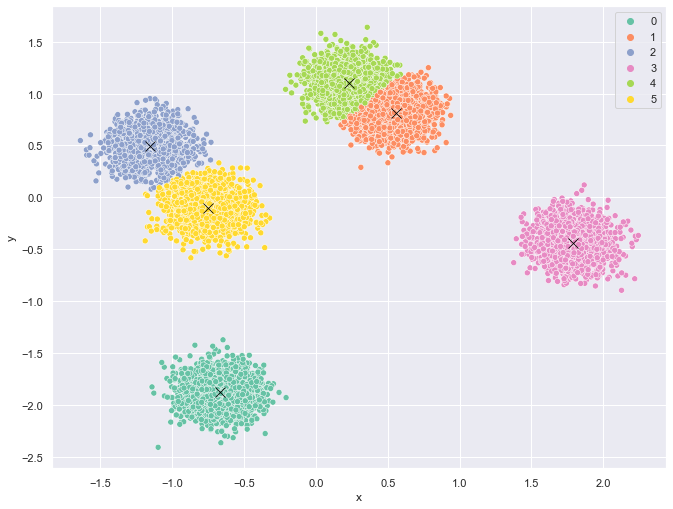

In [8]:
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))

sns.scatterplot( data=df,
                     x="x",
                     y="y",
                     hue="cluster",
                     legend='full',
                     palette="Set2")

sns.scatterplot(x="x", y="y",
                     s=100, color="black", marker="x",
                     data=centroids_df)

Ahora la pregunta que surge de manera natural es ... ¿ cómo escoger el mejor número de clusters?. 

No existe un criterio objetivo ni ampliamente válido para la  elección de un número óptimo de clusters. Aunque no exista un criterio objetivo para la selección del número de clusters, si que se han implementado diferentes métodos que nos ayudan a elegir un número apropiado de clusters para agrupar los datos; como son,

* método del codo (elbow method)
* criterio de Calinsky
* Affinity Propagation (AP)
* Gap (también con su versión estadística)
* Dendrogramas 
* etc.



### Regla del codo

Este método utiliza los valores de la función de perdida, $f(C_l,\mu_l)$, obtenidos tras aplicar el $K$-means a diferente número de Clusters (desde 1 a $N$ clusters).

Una vez obtenidos los valores de la función de pérdida  tras aplicar el K-means de 1 a $N$ clusters, representamos en una gráfica lineal la función de pérdida  respecto del número de clusters. 

En esta gráfica se debería de apreciar un cambio brusco en la evolución de la función de pérdida, teniendo la línea representada una forma similar a la de un brazo y su codo. 

El punto en el que se observa ese cambio brusco en la función de pérdida nos dirá el número óptimo de clusters a seleccionar para ese data set; o dicho de otra manera: el punto que representaría al codo del brazo será el número óptimo de clusters para ese data set
.

In [9]:
# implementación de la regla del codo
Nc = range(1, 15)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow.head()

,Number of Clusters,Score
0,1,49204.855100
1,2,24492.591891
2,3,14747.252054
3,4,6584.804505
4,5,3274.943827


<AxesSubplot:title={'center':'Elbow Curve'}, xlabel='Number of Clusters', ylabel='Score'>

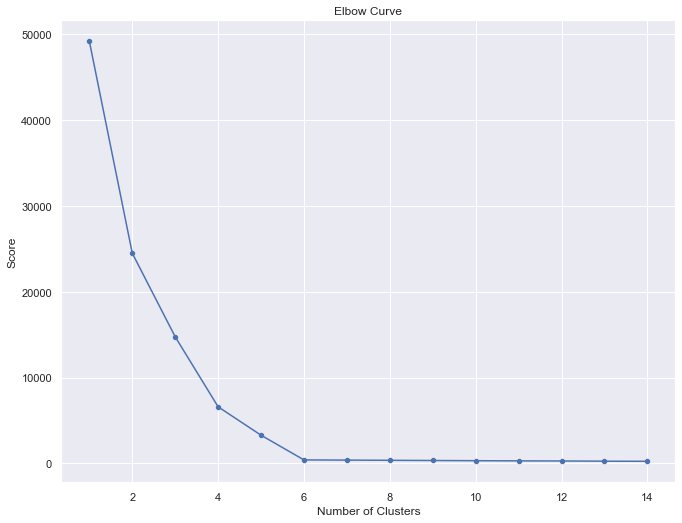

In [10]:
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)

## Referencias

1. [Unsupervised learning](https://scikit-learn.org/stable/unsupervised_learning.html)